第十一章：时间序列

In [27]:
# 日期和时间数据的类型及工具
from datetime import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

now = datetime.now()
print(now)
print(now.year,now.month,now.day)

#timedelta表示两个datetime的时间差
print(datetime(2019,3,2)-datetime(2018,2,2))

datetime = datetime(2019,4,5) - timedelta(100)
print(datetime)

2019-05-27 20:50:59.727559
2019 5 27
393 days, 0:00:00
2018-12-26 00:00:00


In [53]:
from datetime import datetime
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')


'2011-01-03'

In [35]:
# 转换格式
v = '2019-03-04'
datetime.strptime(v,'%Y-%m-%d')#这里的Y是大写的！

datetime.datetime(2019, 3, 4, 0, 0)

In [41]:
# 转换格式2
from dateutil.parser import parse
print(parse('2019-1-1'))
print(parse('Jan 31,1997 10:45 PM'))
# dayfirst=True日放在月前
print(parse('1/2/2019'))
print(parse('1/2/2019',dayfirst=True))

2019-01-01 00:00:00
2019-01-31 22:45:00
2019-01-02 00:00:00
2019-02-01 00:00:00


In [48]:
# to_datetiem()方法
date = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
print(pd.to_datetime(date))

idx = pd.to_datetime(date +[None])
print(idx)
idx.isnull()
# NaT为时间戳数据的null值

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)


array([False, False,  True])

In [56]:
# 时间序列基础
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6),index = dates)
print(ts)
print(ts.index)#类型为：DatetimeIndex
print(ts.index.dtype)

s = ts.index[0]
s

2011-01-02   -1.246124
2011-01-05   -1.693678
2011-01-07   -0.496840
2011-01-08    0.553631
2011-01-10   -1.755780
2011-01-12   -0.406005
dtype: float64
DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)
datetime64[ns]


Timestamp('2011-01-02 00:00:00')

In [58]:
# 索引，选择，子集
# 索引
s = ts.index[2]
print(ts[s])
print(ts['2011-01-02'])

-0.4968398700732917
-1.2461244869625958


In [71]:
long = pd.Series(np.random.randn(1000),
                index = pd.date_range('20000101',periods=1000))
print(long.head())
print(long['2000-1'].head())

# 切片
# 如果给切片赋值，源数据也将改变
print('\n---------切片---------')
print(long['2000-01-01':'2000-01-04'])

print('\n----------赋值后的切片----------')
long['2000-01-01':'2000-01-04'] = 1
print(long.head(10))

2000-01-01   -0.366770
2000-01-02    0.802834
2000-01-03    1.067436
2000-01-04    0.422493
2000-01-05    0.287666
Freq: D, dtype: float64
2000-01-01   -0.366770
2000-01-02    0.802834
2000-01-03    1.067436
2000-01-04    0.422493
2000-01-05    0.287666
Freq: D, dtype: float64

---------切片---------
2000-01-01   -0.366770
2000-01-02    0.802834
2000-01-03    1.067436
2000-01-04    0.422493
Freq: D, dtype: float64

----------赋值后的切片----------
2000-01-01    1.000000
2000-01-02    1.000000
2000-01-03    1.000000
2000-01-04    1.000000
2000-01-05    0.287666
2000-01-06    0.869188
2000-01-07    0.568423
2000-01-08   -0.296702
2000-01-09   -1.103109
2000-01-10    0.428128
Freq: D, dtype: float64


In [73]:
# truncate()方法
long.truncate(after = '2000-01-08 ')
# after:输出给定日期之前的日期
# before:输出给定日期之后的日期    


2000-01-01    1.000000
2000-01-02    1.000000
2000-01-03    1.000000
2000-01-04    1.000000
2000-01-05    0.287666
2000-01-06    0.869188
2000-01-07    0.568423
2000-01-08   -0.296702
Freq: D, dtype: float64

In [74]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
print(long_df.loc['5-2001'])

            Colorado     Texas  New York      Ohio
2001-05-02  0.809781 -0.314559 -0.266880 -0.385847
2001-05-09  0.507457 -0.276302 -0.150332 -0.716301
2001-05-16 -0.488448 -1.376878  0.387466  0.430799
2001-05-23  0.323934 -0.740401  0.912458  1.207624
2001-05-30  0.512137 -0.163269  0.275771 -0.957317


In [82]:
# 含有重复索引的时间序列
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/1/2000'])
du = pd.Series(np.arange(5),index = dates)
print(du.index.is_unique)
print(du['1/2/2000'])
print(du['1/1/2000'])

#聚合含有重复时间戳的数据
g = du.groupby(level = 0)#见书上笔记：P312
g.mean()

False
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32
2000-01-01    0
2000-01-01    4
dtype: int32


2000-01-01    2
2000-01-02    2
dtype: int32

In [92]:
#生成日期范围
index = pd.date_range('2012-04-01', '2012-06-01')
print(index[:10])
print(pd.date_range(start='2019-1-2',periods=10))

print('\n-------频率为每月最后一天--------\n')
print(pd.date_range(start='2019-1-2',periods=10,freq = 'M'))


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11'],
              dtype='datetime64[ns]', freq='D')

-------频率为每月最后一天--------

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='M')


In [95]:
#标准化时间戳（去掉时分秒）
print(pd.date_range('2010-1-1 12:33:20',periods=5))
print(pd.date_range('2010-1-1 12:33:20',periods=5,normalize=True))

DatetimeIndex(['2010-01-01 12:33:20', '2010-01-02 12:33:20',
               '2010-01-03 12:33:20', '2010-01-04 12:33:20',
               '2010-01-05 12:33:20'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05'],
              dtype='datetime64[ns]', freq='D')


In [100]:
#频率和日期偏置
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
print(hour)
f_hour = Hour(4)
print(f_hour)

print(pd.date_range('2000-01-01', '2000-01-03 23:59',
             freq = '4H'))

pd.date_range('2000-01-01',periods=10,
             freq = '1h30min')

<Hour>
<4 * Hours>
DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [102]:
#月中某星期（week of month）
#每月第三个星期五
r = pd.date_range('2012-1-1','2012-9-1',freq = 'WOM-3FRI')
r

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [116]:
#日期偏移
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
print('\n')
#这里是index不变，平移数据
print('-----这里是index不变，平移数据------\n')
print(ts.shift(1))#往下移两个
print('\n')

print(ts.shift(-1))

print('\n-------应用------')
#增长率
pct = ts/ts.shift(1)-1
print(pct)

#这里是index和数据一起平移
print('\n-----这里是index和数据一起平移------')
ts.shift(1,freq = 'M')

2000-01-31    2.123967
2000-02-29    0.608459
2000-03-31    0.521527
2000-04-30    0.450241
Freq: M, dtype: float64


-----这里是index不变，平移数据------

2000-01-31         NaN
2000-02-29    2.123967
2000-03-31    0.608459
2000-04-30    0.521527
Freq: M, dtype: float64


2000-01-31    0.608459
2000-02-29    0.521527
2000-03-31    0.450241
2000-04-30         NaN
Freq: M, dtype: float64

-------应用------
2000-01-31         NaN
2000-02-29   -0.713527
2000-03-31   -0.142871
2000-04-30   -0.136688
Freq: M, dtype: float64

-----这里是index和数据一起平移------


2000-02-29    2.123967
2000-03-31    0.608459
2000-04-30    0.521527
2000-05-31    0.450241
Freq: M, dtype: float64

In [128]:
from pandas.tseries.offsets import Day,MonthEnd
now = datetime(2011,11,17)
print(now+3*Day())
print(now+MonthEnd())
print(now+MonthEnd(1))
print(now+MonthEnd(2))
#MonthEnd(1)和MonthEnd()等价

print('\n-------rollforward和rollback---------')
# rollforward和rollback
o = MonthEnd()
print(o.rollforward(now))
print(o.rollback(now))

print('\n------与groupby()一起的创造性用法------')
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(ts)
ts.groupby(MonthEnd().rollforward).mean()

2011-11-20 00:00:00
2011-11-30 00:00:00
2011-11-30 00:00:00
2011-12-31 00:00:00

-------rollforward和rollback---------
2011-11-30 00:00:00
2011-10-31 00:00:00

------与groupby()一起的创造性用法------
2000-01-15    0.371704
2000-01-19    2.563576
2000-01-23   -1.316261
2000-01-27   -0.108167
2000-01-31   -0.079626
2000-02-04    1.485499
2000-02-08    1.606968
2000-02-12    0.248502
2000-02-16    0.915796
2000-02-20   -0.506583
2000-02-24   -1.145328
2000-02-28    1.375662
2000-03-03    1.249393
2000-03-07   -2.892770
2000-03-11   -0.610018
2000-03-15    2.056888
2000-03-19    1.339373
2000-03-23    1.275053
2000-03-27   -2.009477
2000-03-31   -0.908547
Freq: 4D, dtype: float64


2000-01-31    0.286245
2000-02-29    0.568645
2000-03-31   -0.062513
dtype: float64

In [132]:
#时区处理
import pytz
print(pytz.common_timezones[-5:])
tz = pytz.timezone('America/New_York')
tz

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']


<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [ ]:
#时区跳过

In [135]:
#时间区间和区间算数
p = pd.Period(2007,freq = 'A-DEC')
p+5

Period('2012', 'A-DEC')

In [139]:
# DatetimeIndex储存的是时区的序列，可以作为任意pandas数据结构的索引
r = pd.date_range('2000-1-1','2000-6-30',freq = 'M')
print(r)
pd.Series(np.random.randn(len(r)),index = r)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30'],
              dtype='datetime64[ns]', freq='M')


2000-01-31    0.300148
2000-02-29    0.553764
2000-03-31    0.647267
2000-04-30    1.212276
2000-05-31    0.401715
2000-06-30   -0.381857
Freq: M, dtype: float64

In [6]:
# 时期的频率转换
p = pd.Period('2007',freq = 'A-DEC')
print(p)
print(p.asfreq('M',how = 'start'))
p.asfreq('M',how = 'end')

2007
2007-01


Period('2007-12', 'M')

In [8]:
p = pd.Period('2007',freq = 'A-JUN')
p.asfreq('M',how = 'start')

Period('2006-07', 'M')

In [13]:
#将时间戳转换为时期to_period()方法
r = pd.date_range('2000-1-1',periods=3,freq = 'M')
ts = pd.Series(np.random.randn(3),index = r)
print(ts)
pts = ts.to_period()#将时间戳转换为时期
print(pts)

2000-01-31    1.269573
2000-02-29   -0.275738
2000-03-31    1.108427
Freq: M, dtype: float64
2000-01    1.269573
2000-02   -0.275738
2000-03    1.108427
Freq: M, dtype: float64


In [15]:
r = pd.date_range('2000-1-29',periods=6,freq = 'D')
ts2 = pd.Series(np.random.randn(len(r)),index = r)
print(ts2)
pts2 = ts2.to_period()
print(pts2)
pts3 = ts2.to_period('M')#时期长短可调整
pts3

2000-01-29    0.641164
2000-01-30    1.590604
2000-01-31   -0.984512
2000-02-01   -0.007769
2000-02-02    1.166151
2000-02-03   -1.092465
Freq: D, dtype: float64
2000-01-29    0.641164
2000-01-30    1.590604
2000-01-31   -0.984512
2000-02-01   -0.007769
2000-02-02    1.166151
2000-02-03   -1.092465
Freq: D, dtype: float64


2000-01    0.641164
2000-01    1.590604
2000-01   -0.984512
2000-02   -0.007769
2000-02    1.166151
2000-02   -1.092465
Freq: M, dtype: float64

In [21]:
#将时间转换回时间戳to_timestamp()
pts = ts2.to_period()
print(pts)
print(pts.to_timestamp())
print(pts.to_timestamp(how = 'start'))#这里为啥没有区别？？

2000-01-29    0.641164
2000-01-30    1.590604
2000-01-31   -0.984512
2000-02-01   -0.007769
2000-02-02    1.166151
2000-02-03   -1.092465
Freq: D, dtype: float64
2000-01-29    0.641164
2000-01-30    1.590604
2000-01-31   -0.984512
2000-02-01   -0.007769
2000-02-02    1.166151
2000-02-03   -1.092465
Freq: D, dtype: float64
2000-01-29    0.641164
2000-01-30    1.590604
2000-01-31   -0.984512
2000-02-01   -0.007769
2000-02-02    1.166151
2000-02-03   -1.092465
Freq: D, dtype: float64


In [26]:
# 通过数组创建PeriodIndex
data = pd.read_csv(r'C:\Users\123\Desktop\macrodata.csv')
print(data.head(2))
print(data.year.head())
print(data.quarter.head())

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64
0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64


In [27]:
'''通过通过将这些数组以及⼀个频率传⼊PeriodIndex，就可以将
它们合并成DataFrame的⼀个索引'''
index = pd.PeriodIndex(year = data.year, quarter = data.quarter,
                      freq = 'Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [30]:
data.index = index
data.infl.head()#这个是什么东西？？

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

In [2]:
# 重采样及频率转换resample()
'''重采样：将时间序列频率转换
   升采样：低频率转换为高频率
   降采样：高频率转换为低频率'''
r = pd.date_range('2000-1-1',periods = 100,freq = 'D')
s = pd.Series(np.random.randn(len(r)),index = r)
print(s.head())
print('\n---------resample---------')
print(s.resample('M').mean())
print(s.resample('M',kind = 'period').mean())
#kind可选择聚合到时间戳或者时期

2000-01-01   -1.103125
2000-01-02   -0.864612
2000-01-03   -0.410296
2000-01-04   -1.256236
2000-01-05    0.630949
Freq: D, dtype: float64

---------resample---------
2000-01-31   -0.227897
2000-02-29   -0.155966
2000-03-31    0.070309
2000-04-30    0.385659
Freq: M, dtype: float64
2000-01   -0.227897
2000-02   -0.155966
2000-03    0.070309
2000-04    0.385659
Freq: M, dtype: float64


In [10]:
#降采样
r = pd.date_range('2000-1-1',periods = 12, freq = 'T')
ts = pd.Series(np.arange(12),index = r)
print(ts)

print('\n')
print(ts.resample('5min',closed = 'right',label = 'right').sum())

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32


In [14]:
# OHLC重采样
'''第⼀个值（open，开盘）、最后⼀个值（close，收
盘）、最⼤值（high，最⾼）以及最⼩值（low，最低）'''
ts.resample('5min',how = 'ohlc')
# ts.resample('5min').ohlc()两种方法都可以

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  after removing the cwd from sys.path.


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [15]:
# 升采样和插值
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.746402,-0.040021,0.705508,-2.034603
2000-01-12,-0.272020,-0.801511,0.706958,0.328763


In [16]:
# 使用asfreq()
frame.resample('D').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-05,0.746402,-0.040021,0.705508,-2.034603
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.272020,-0.801511,0.706958,0.328763


In [17]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.746402,-0.040021,0.705508,-2.034603
2000-01-06,0.746402,-0.040021,0.705508,-2.034603
2000-01-07,0.746402,-0.040021,0.705508,-2.034603
2000-01-08,0.746402,-0.040021,0.705508,-2.034603
2000-01-09,0.746402,-0.040021,0.705508,-2.034603
2000-01-10,0.746402,-0.040021,0.705508,-2.034603
2000-01-11,0.746402,-0.040021,0.705508,-2.034603
2000-01-12,-0.272020,-0.801511,0.706958,0.328763


In [18]:
# 通过时期进⾏重采样
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-2.493069,1.741873,-0.486126,-1.334926
2000-02,0.267506,1.698226,-0.434662,1.316640
2000-03,-0.890093,-0.766789,-0.782755,-1.548576
2000-04,0.000314,0.311272,0.825292,-0.668756
2000-05,0.596443,-1.306804,-0.428997,2.043944


In [21]:
a = frame.resample('A-DEC').mean()
a

,Colorado,Texas,New York,Ohio
2000,0.267926,0.443662,-0.034820,0.460569
2001,0.025533,-0.266287,-0.261732,0.252199


In [25]:
# 并不知道convention的作用是啥？
print(a.resample('Q-DEC').ffill())
print('\n')
print(a.resample('Q-DEC',convention='end').ffill())

        Colorado     Texas  New York      Ohio
2000Q1  0.267926  0.443662 -0.034820  0.460569
2000Q2  0.267926  0.443662 -0.034820  0.460569
2000Q3  0.267926  0.443662 -0.034820  0.460569
2000Q4  0.267926  0.443662 -0.034820  0.460569
2001Q1  0.025533 -0.266287 -0.261732  0.252199
2001Q2  0.025533 -0.266287 -0.261732  0.252199
2001Q3  0.025533 -0.266287 -0.261732  0.252199
2001Q4  0.025533 -0.266287 -0.261732  0.252199


        Colorado     Texas  New York      Ohio
2000Q4  0.267926  0.443662 -0.034820  0.460569
2001Q1  0.267926  0.443662 -0.034820  0.460569
2001Q2  0.267926  0.443662 -0.034820  0.460569
2001Q3  0.267926  0.443662 -0.034820  0.460569
2001Q4  0.025533 -0.266287 -0.261732  0.252199


            AAPL   MSFT    XOM     SPX
2003-01-02  7.40  21.11  29.22  909.03
2003-01-03  7.45  21.14  29.24  908.59
2003-01-06  7.45  21.52  29.96  929.01
2003-01-07  7.43  21.93  28.95  922.93
2003-01-08  7.28  21.31  28.83  909.93
            AAPL   MSFT    XOM
2003-01-02  7.40  21.11  29.22
2003-01-03  7.45  21.14  29.24
2003-01-06  7.45  21.52  29.96
2003-01-07  7.43  21.93  28.95
2003-01-08  7.28  21.31  28.83
AxesSubplot(0.125,0.125;0.775x0.755)


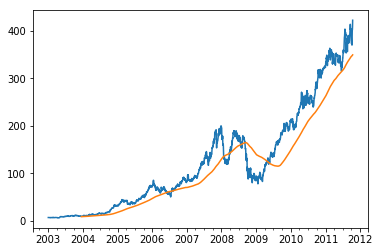

In [39]:
# 移动窗⼝函数
px_all = pd.read_csv(r'C:\Users\123\Desktop\stock_px_2.csv',
                    parse_dates=True,index_col = 0)
print(px_all.head())
px = px_all[['AAPL','MSFT','XOM']]
print(px.head())
px = px.resample('B').ffill()
print(px['AAPL'].plot())
px['AAPL'].rolling(250).mean().plot()

In [44]:
ap_250 = px['AAPL'].rolling(250,min_periods = 10).std()
ap_250.head(12)

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

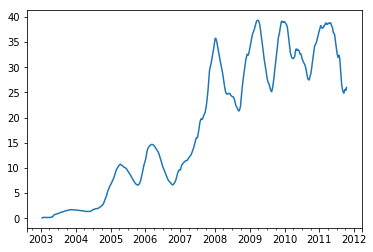

In [45]:
ap_250.plot()

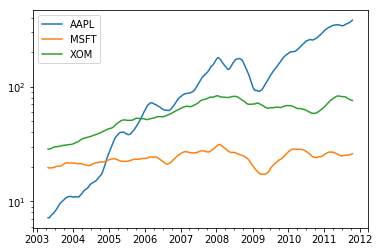

In [50]:
ex = ap_250.expanding().mean()
px.rolling(80).mean().plot(logy = True)
# logy = True这个参数是什么意思呢？？

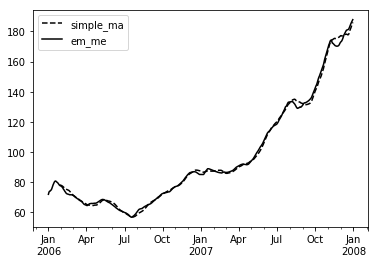

In [51]:
# 指数加权函数
appl = px['AAPL']['2006':'2007']
ma60 = appl.rolling(30,min_periods = 20).mean()
e_ma60 = appl.ewm(span = 30).mean()
ma60.plot(style='k--',label = 'simple_ma')
e_ma60.plot(style = 'k-',label = 'em_me')
plt.legend()